In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
SAVE_PLOTS = False

In [3]:
df = pd.read_csv("../output/a_fit/data.csv")
df

laplace     boundary     integrator  space_grid_size  inv_time_s  \
0     CentralFD  Neumann (1)  ExplicitEuler               10    0.000102   
1     CentralFD  Neumann (1)  ImplicitEuler               10    0.001131   
2     CentralFD  Neumann (1)            RK4               10    0.000897   
3     CentralFD  Neumann (1)         RK4(5)               10    0.002532   
4     CentralFD  Neumann (2)  ExplicitEuler               10    0.000149   
..          ...          ...            ...              ...         ...   
315  CentralFD4  Neumann (1)         RK4(5)              200   12.644700   
316  CentralFD4  Neumann (2)  ExplicitEuler              200    1.070540   
317  CentralFD4  Neumann (2)  ImplicitEuler              200    3.672070   
318  CentralFD4  Neumann (2)            RK4              200    4.631770   
319  CentralFD4  Neumann (2)         RK4(5)              200    9.936240   

     a_fitted  inv_abs_error  inv_rel_error  fwd_time_s   fwd_mse  
0    0.152991       0.047009       0.235046    0.000005  63.98860  
1    0.154312       0.045688       0.228440    0.000050  70.99430  
2    0.153652       0.046348       0.231738    0.000037  64.07330  
3    0.153651       0.046349       0.231743    0.000075  64.90620  
4    0.189504       0.010496       0.052478    0.000006   4.28241  
..        ...            ...            ...         ...       ...  
315  0.181525       0.018475       0.092374    0.498072   3.73499  
316  0.182918       0.017082       0.085412    0.042574   5.39773  
317  0.182919       0.017081       0.085404    0.116186   5.39852  
318  0.182916       0.017084       0.085420    0.175741   5.39968  
319  0.182922       0.017078       0.085391    0.488608   5.39597  

[320 rows x 10 columns]

In [4]:
def get_shorthand(laplace: str, integrator: str, boundary: str) -> str:
    def laplace_shorthand(l: str) -> str:
        if l == "CentralFD":
            return "cfd2"
        elif l == "CentralFD4":
            return "cfd4"
        else:
            raise ValueError(f"Unknown laplace operator: `{l}`")

    def integrator_shorthand(i: str) -> str:
        if i == "ExplicitEuler":
            return "ee"
        elif i == "ImplicitEuler":
            return "im"
        elif i == "RK4":
            return "rk4"
        elif i == "RK4(5)":
            return "rk45"
        else:
            raise ValueError(f"Unknown integrator operator: `{i}`")

    def boundary_shorthand(b: str) -> str:
        if b == "Neumann (1)":
            return "n1"
        elif b == "Neumann (2)":
            return "n2"
        else:
            raise ValueError(f"Unknown boundary condition operator: `{b}`")

    return f"{laplace_shorthand(laplace)}_{integrator_shorthand(integrator)}_{boundary_shorthand(boundary)}"

In [5]:
def get_marker(laplace: str, boundary: str) -> str:
    if laplace == "CentralFD":
        if boundary == "Neumann (1)":
            return "+"
        elif boundary == "Neumann (2)":
            return "P"
        else:
            raise ValueError(f"Unknown boundary condition operator: `{boundary}`")
    elif laplace == "CentralFD4":
        if boundary == "Neumann (1)":
            return "x"
        elif boundary == "Neumann (2)":
            return "X"
        else:
            raise ValueError(f"Unknown boundary condition operator: `{boundary}`")
    else:
        raise ValueError(f"Unknown laplace operator: `{laplace}`")

def get_color(integrator: str) -> str:
    if integrator == "ExplicitEuler":
        return "tab:orange"
    elif integrator == "ImplicitEuler":
        return "tab:blue"
    elif integrator == "RK4":
        return "tab:red"
    elif integrator == "RK4(5)":
        return "tab:purple"
    else:
        raise ValueError(f"Unknown integrator operator: `{integrator}`")

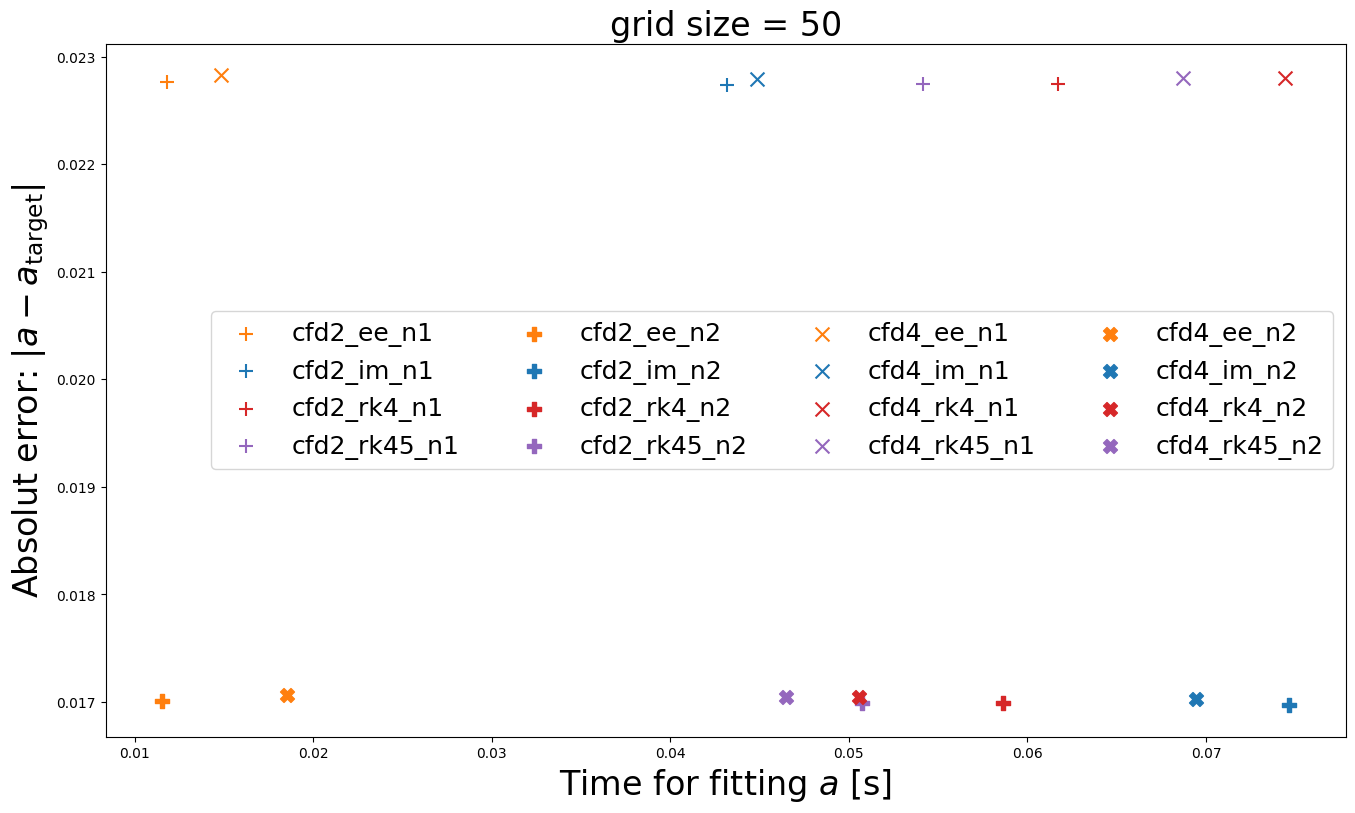

In [6]:
GRID_SIZE = 50

plt.figure(figsize=(16, 9))

for idx in df[df['space_grid_size'] == GRID_SIZE].index:
    marker = get_marker(laplace=df.loc[idx, 'laplace'], boundary=df.loc[idx, 'boundary'])
    color  = get_color(df.loc[idx, 'integrator'])
    label  = get_shorthand(laplace=df.loc[idx, "laplace"],
                           integrator=df.loc[idx, "integrator"],
                           boundary=df.loc[idx, "boundary"])
    plt.scatter(df.loc[idx, "inv_time_s"],
                df.loc[idx, "inv_abs_error"],
                marker=marker,
                c=color,
                s=100,
                label=label)

plt.xlabel("Time for fitting $a$ [s]", fontsize=24)
plt.ylabel(R"Absolut error: $|a - a_{\mathrm{target}}|$", fontsize=24)
plt.legend(ncol=4, fontsize=18)
plt.title(f"grid size = {GRID_SIZE}", fontsize=24)

plt.show()

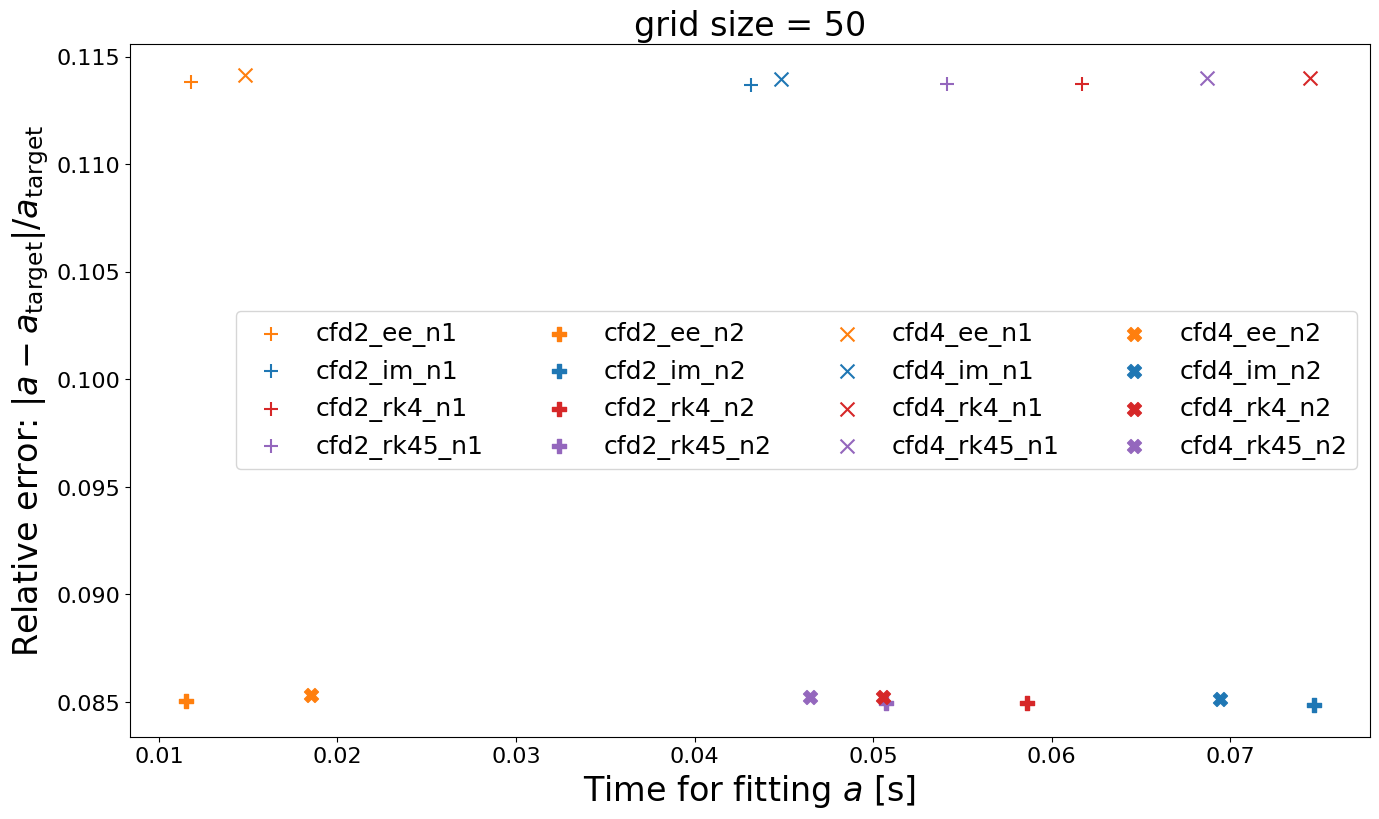

In [7]:
plt.figure(figsize=(16, 9))

for idx in df[df['space_grid_size'] == GRID_SIZE].index:
    marker = get_marker(laplace=df.loc[idx, 'laplace'], boundary=df.loc[idx, 'boundary'])
    color  = get_color(df.loc[idx, 'integrator'])
    label  = get_shorthand(laplace=df.loc[idx, "laplace"],
                           integrator=df.loc[idx, "integrator"],
                           boundary=df.loc[idx, "boundary"])
    plt.scatter(df.loc[idx, "inv_time_s"],
                df.loc[idx, "inv_rel_error"],
                marker=marker,
                c=color,
                s=100,
                label=label)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time for fitting $a$ [s]", fontsize=24)
plt.ylabel(R"Relative error: $|a - a_{\mathrm{target}}| / a_{\mathrm{target}}$", fontsize=24)
plt.legend(ncol=4, fontsize=18)
plt.title(f"grid size = {GRID_SIZE}", fontsize=24)

if SAVE_PLOTS:
    plt.savefig(f"pc_inv_rel_{GRID_SIZE}.svg")

plt.show()

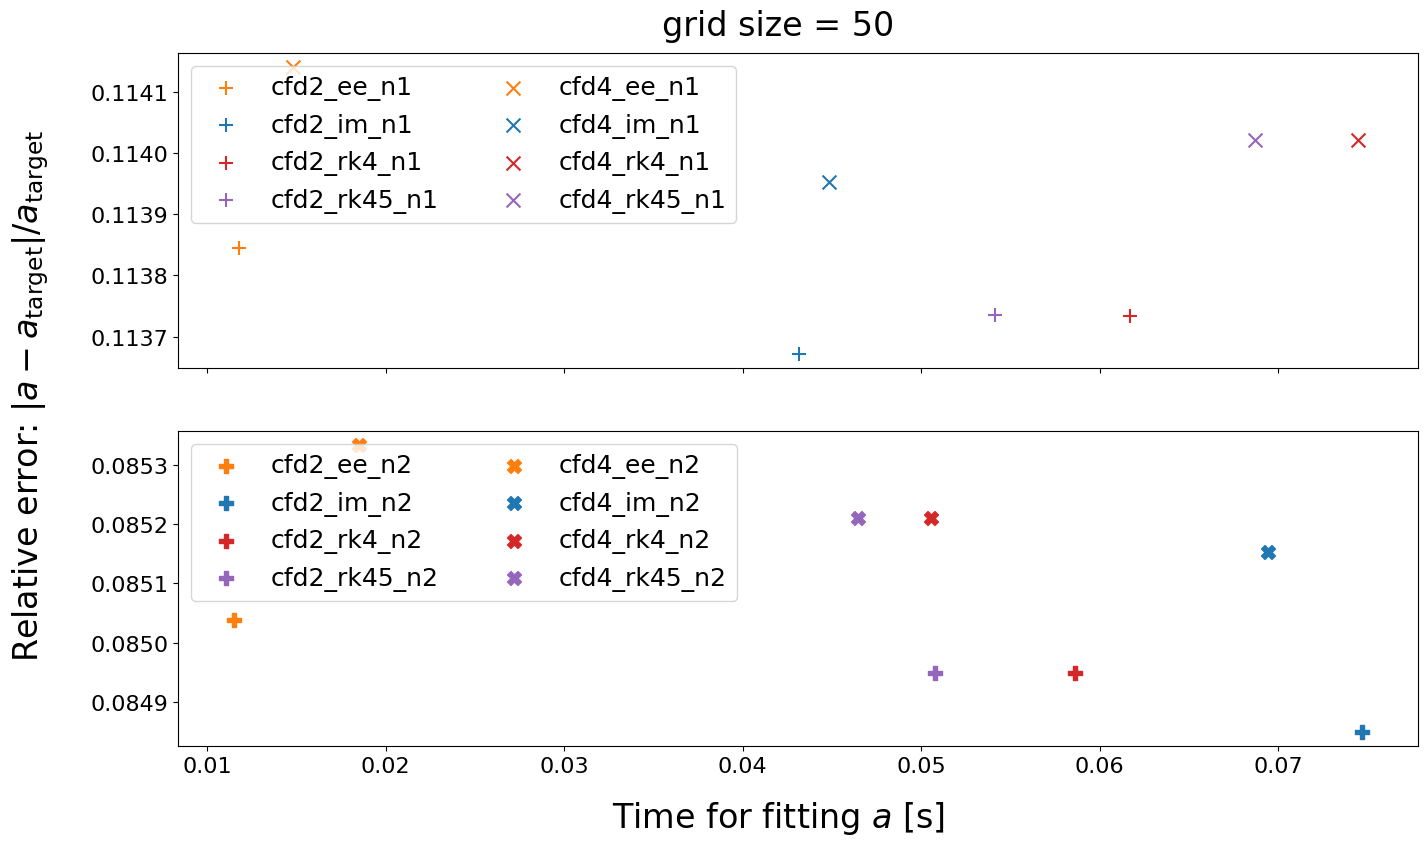

In [8]:
fig, ax = plt.subplots(nrows=2, figsize=(16, 9), sharex=True)

for idx in df[df['space_grid_size'] == GRID_SIZE].index:
    if df.loc[idx, 'boundary'] == "Neumann (1)":
        a = ax[0]
    elif df.loc[idx, 'boundary'] == "Neumann (2)":
        a = ax[1]
    else:
        assert False, f"Unknown boundary type {df.loc[idx, 'boundary']}"

    marker = get_marker(laplace=df.loc[idx, 'laplace'], boundary=df.loc[idx, 'boundary'])
    color  = get_color(df.loc[idx, 'integrator'])
    label  = get_shorthand(laplace=df.loc[idx, "laplace"],
                           integrator=df.loc[idx, "integrator"],
                           boundary=df.loc[idx, "boundary"])
    a.scatter(df.loc[idx, "inv_time_s"],
                df.loc[idx, "inv_rel_error"],
                marker=marker,
                c=color,
                s=100,
                label=label)

ax[0].tick_params(labelsize=16)
ax[1].tick_params(labelsize=16)

ax[0].legend(ncol=2, fontsize=18)
ax[1].legend(ncol=2, fontsize=18)

fig.text(0.5, 0.02,
         "Time for fitting $a$ [s]",
         ha='center', fontsize=24)
fig.text(0.02, 0.5,
         R"Relative error: $|a - a_{\mathrm{target}}| / a_{\mathrm{target}}$",
         va='center', fontsize=24, rotation='vertical')
fig.text(0.5, 0.9,
         f"grid size = {GRID_SIZE}",
         ha='center', fontsize=24)

if SAVE_PLOTS:
    plt.savefig(f"pc_inv_rel_split_{GRID_SIZE}.svg")

plt.show()

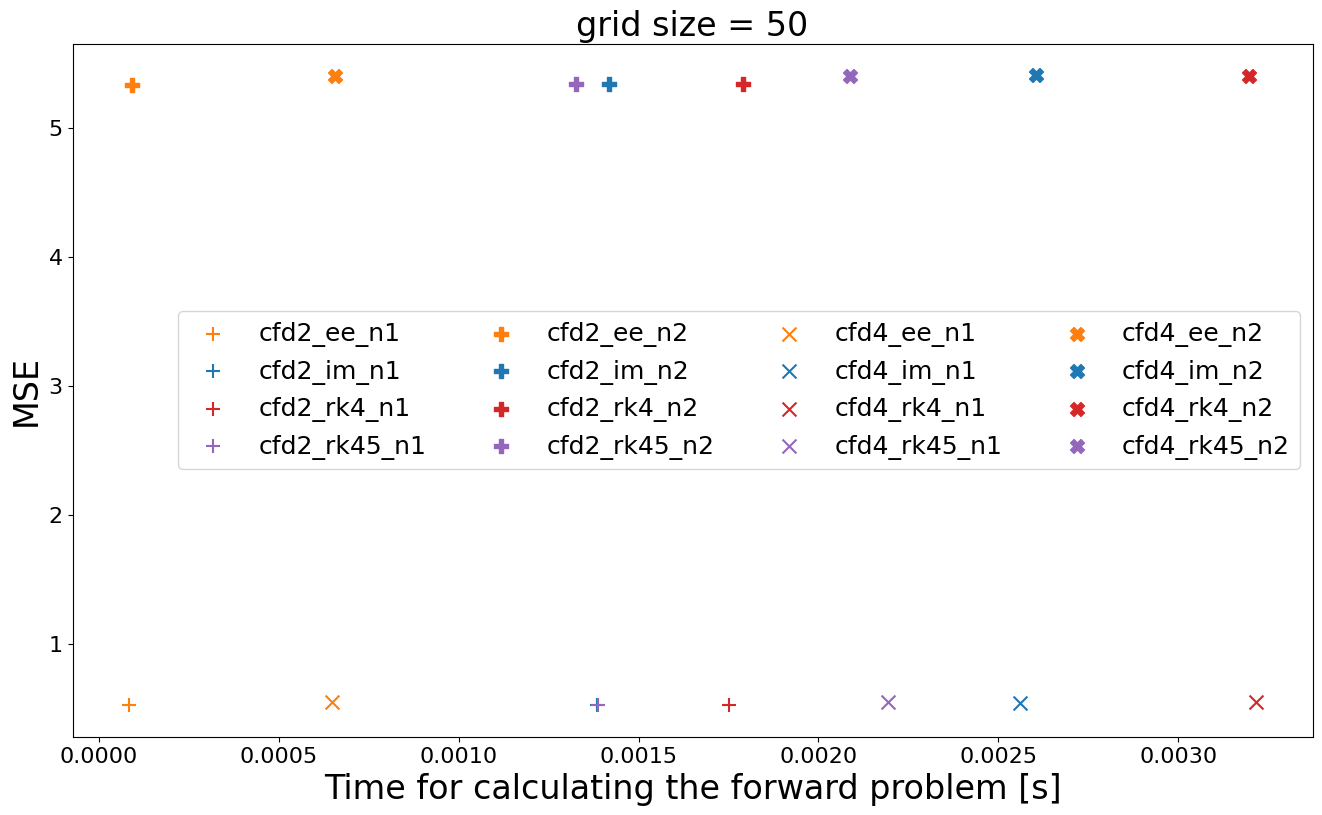

In [9]:
plt.figure(figsize=(16, 9))

for idx in df[df['space_grid_size'] == GRID_SIZE].index:
    marker = get_marker(laplace=df.loc[idx, 'laplace'], boundary=df.loc[idx, 'boundary'])
    color  = get_color(df.loc[idx, 'integrator'])
    label  = get_shorthand(laplace=df.loc[idx, "laplace"],
                           integrator=df.loc[idx, "integrator"],
                           boundary=df.loc[idx, "boundary"])
    plt.scatter(df.loc[idx, "fwd_time_s"],
                df.loc[idx, "fwd_mse"],
                marker=marker,
                c=color,
                s=100,
                label=label)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Time for calculating the forward problem [s]", fontsize=24)
plt.ylabel("MSE", fontsize=24)
plt.legend(ncol=4, fontsize=18)
plt.title(f"grid size = {GRID_SIZE}", fontsize=24)

if SAVE_PLOTS:
    plt.savefig(f"pc_subsequent_fwd_problem_{GRID_SIZE}.svg")

plt.show()

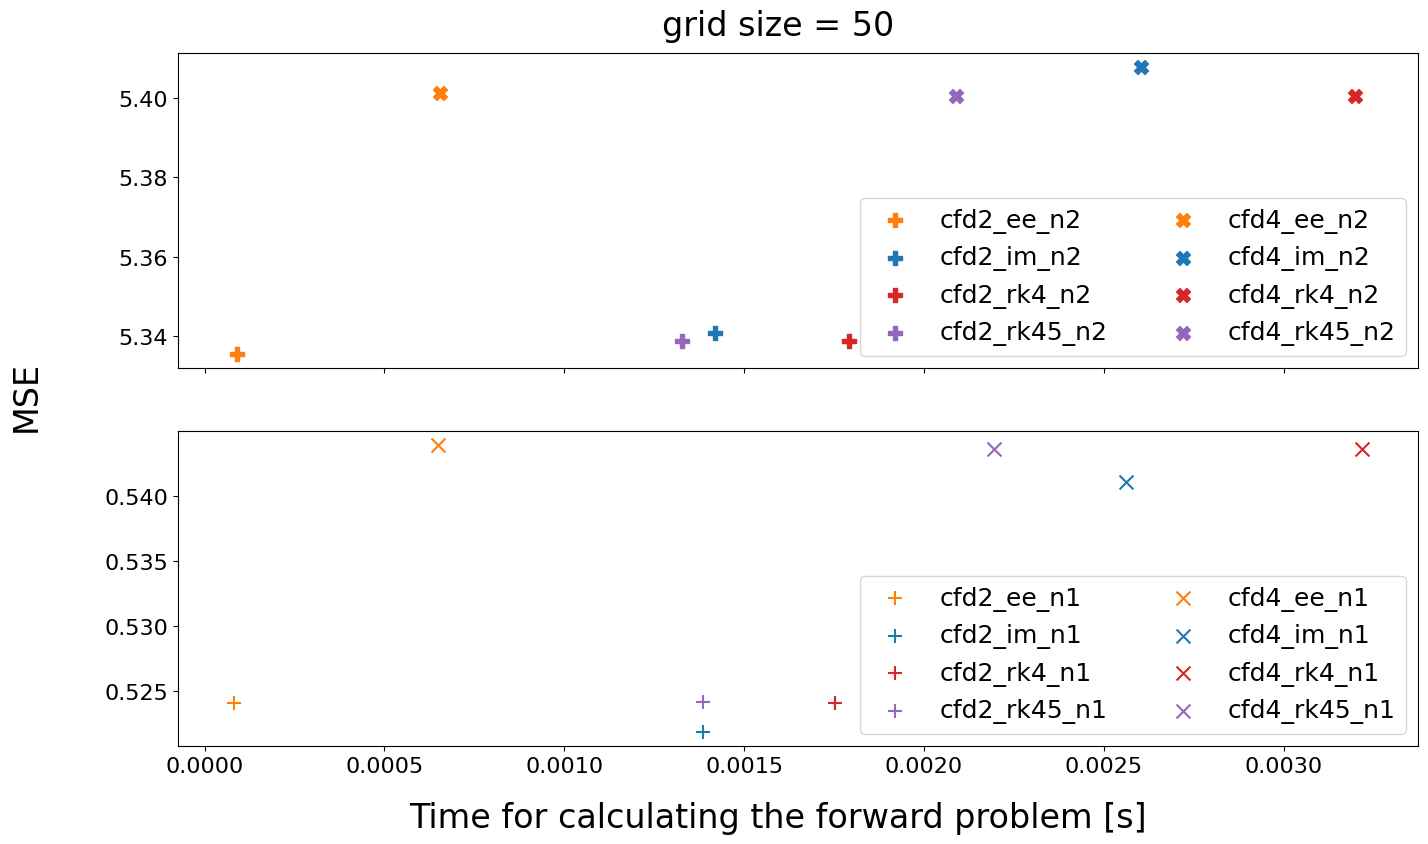

In [10]:
fig, ax = plt.subplots(nrows=2, figsize=(16, 9), sharex=True)

for idx in df[df['space_grid_size'] == GRID_SIZE].index:
    if df.loc[idx, 'boundary'] == "Neumann (1)":
        a = ax[1]
    elif df.loc[idx, 'boundary'] == "Neumann (2)":
        a = ax[0]
    else:
        assert False, f"Unknown boundary type {df.loc[idx, 'boundary']}"

    marker = get_marker(laplace=df.loc[idx, 'laplace'], boundary=df.loc[idx, 'boundary'])
    color  = get_color(df.loc[idx, 'integrator'])
    label  = get_shorthand(laplace=df.loc[idx, "laplace"],
                           integrator=df.loc[idx, "integrator"],
                           boundary=df.loc[idx, "boundary"])
    a.scatter(df.loc[idx, "fwd_time_s"],
                df.loc[idx, "fwd_mse"],
                marker=marker,
                c=color,
                s=100,
                label=label)

ax[0].tick_params(labelsize=16)
ax[1].tick_params(labelsize=16)

ax[0].legend(ncol=2, fontsize=18)
ax[1].legend(ncol=2, fontsize=18)

fig.text(0.5, 0.02,
         "Time for calculating the forward problem [s]",
         ha='center', fontsize=24)
fig.text(0.02, 0.5,
         "MSE",
         va='center', fontsize=24, rotation='vertical')
fig.text(0.5, 0.9,
         f"grid size = {GRID_SIZE}",
         ha='center', fontsize=24)

if SAVE_PLOTS:
    plt.savefig(f"pc_subsequent_fwd_problem_split_{GRID_SIZE}.svg")

plt.show()

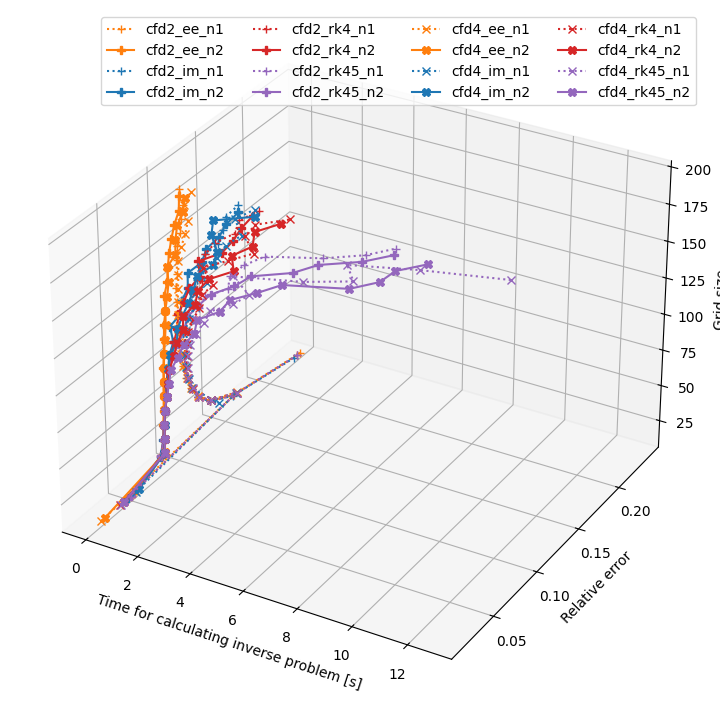

In [11]:
fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(projection='3d')


laplace_opts    = ["CentralFD", "CentralFD4"]
integrator_opts = ["ExplicitEuler", "ImplicitEuler", "RK4", "RK4(5)"]
boundary_opts   = ["Neumann (1)", "Neumann (2)"]

for l in laplace_opts:
    for i in integrator_opts:
        for b in boundary_opts:
            df_red = df[(df['laplace'] == l) & (df['integrator'] == i) & (df['boundary'] == b)]
            x = df_red['inv_time_s'].to_numpy()
            y = df_red['inv_rel_error'].to_numpy()
            z = df_red['space_grid_size'].to_numpy()

            marker = get_marker(laplace=l, boundary=b)
            color  = get_color(i)
            label  = get_shorthand(laplace=l, integrator=i, boundary=b)
            linestyle = ":" if b == "Neumann (1)" else "-"

            ax.plot(x, y, z, label=label, marker=marker, color=color, linestyle=linestyle)

ax.set_xlabel("Time for calculating inverse problem [s]")
ax.set_ylabel("Relative error")
ax.set_zlabel("Grid size")
ax.legend(ncol=4)

plt.show()

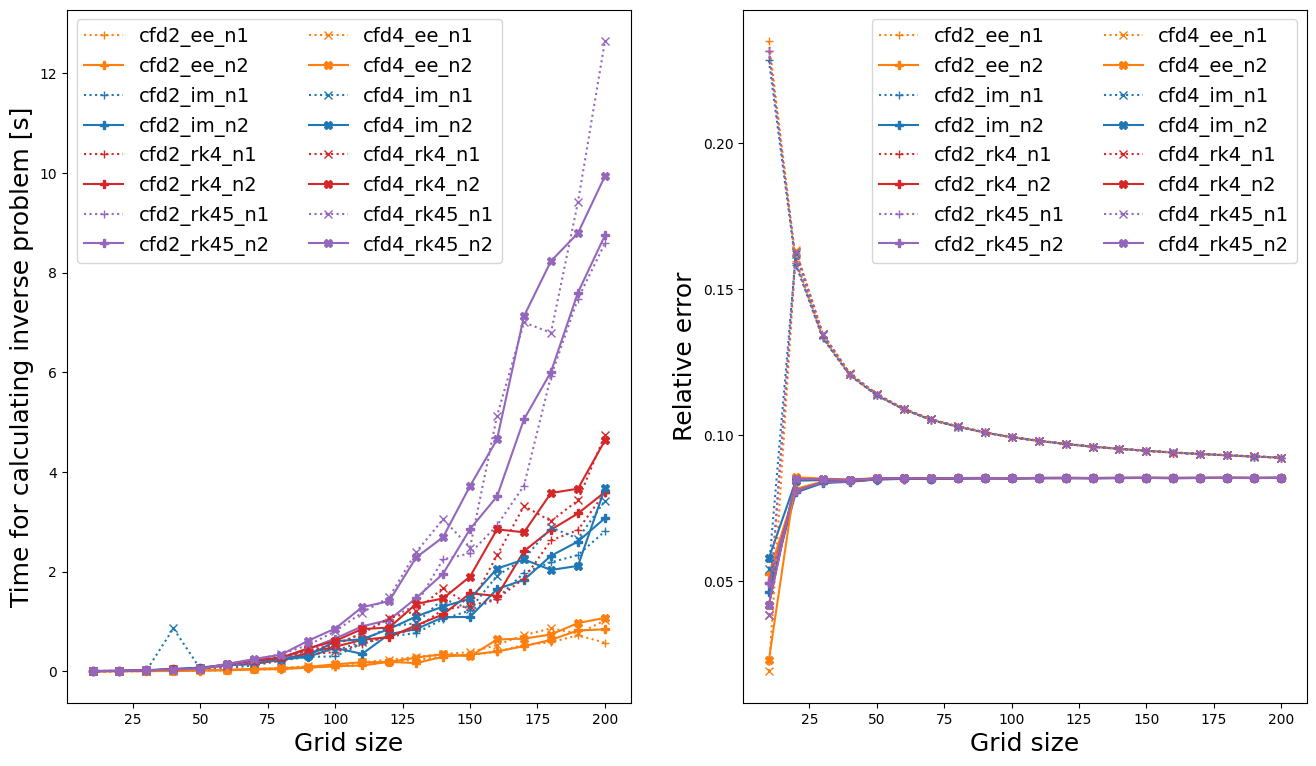

In [12]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 9))

for l in laplace_opts:
    for i in integrator_opts:
        for b in boundary_opts:
            df_red = df[(df['laplace'] == l) & (df['integrator'] == i) & (df['boundary'] == b)]

            marker = get_marker(laplace=l, boundary=b)
            color  = get_color(i)
            label  = get_shorthand(laplace=l, integrator=i, boundary=b)
            linestyle = ":" if b == "Neumann (1)" else "-"

            ax[0].plot(df_red['space_grid_size'].to_numpy(),
                       df_red['inv_time_s'].to_numpy(),
                       label=label, marker=marker, color=color, linestyle=linestyle)
            ax[1].plot(df_red['space_grid_size'].to_numpy(),
                       df_red['inv_rel_error'].to_numpy(),
                       label=label, marker=marker, color=color, linestyle=linestyle)

ax[0].set_xlabel("Grid size", fontsize=18)
ax[0].set_ylabel("Time for calculating inverse problem [s]", fontsize=18)
ax[0].legend(ncols=2, fontsize=14)

ax[1].set_xlabel("Grid size", fontsize=18)
ax[1].set_ylabel("Relative error", fontsize=18)
ax[1].legend(ncols=2, fontsize=14)

if SAVE_PLOTS:
    plt.savefig("compare_grid_size_inv.svg")

plt.show()

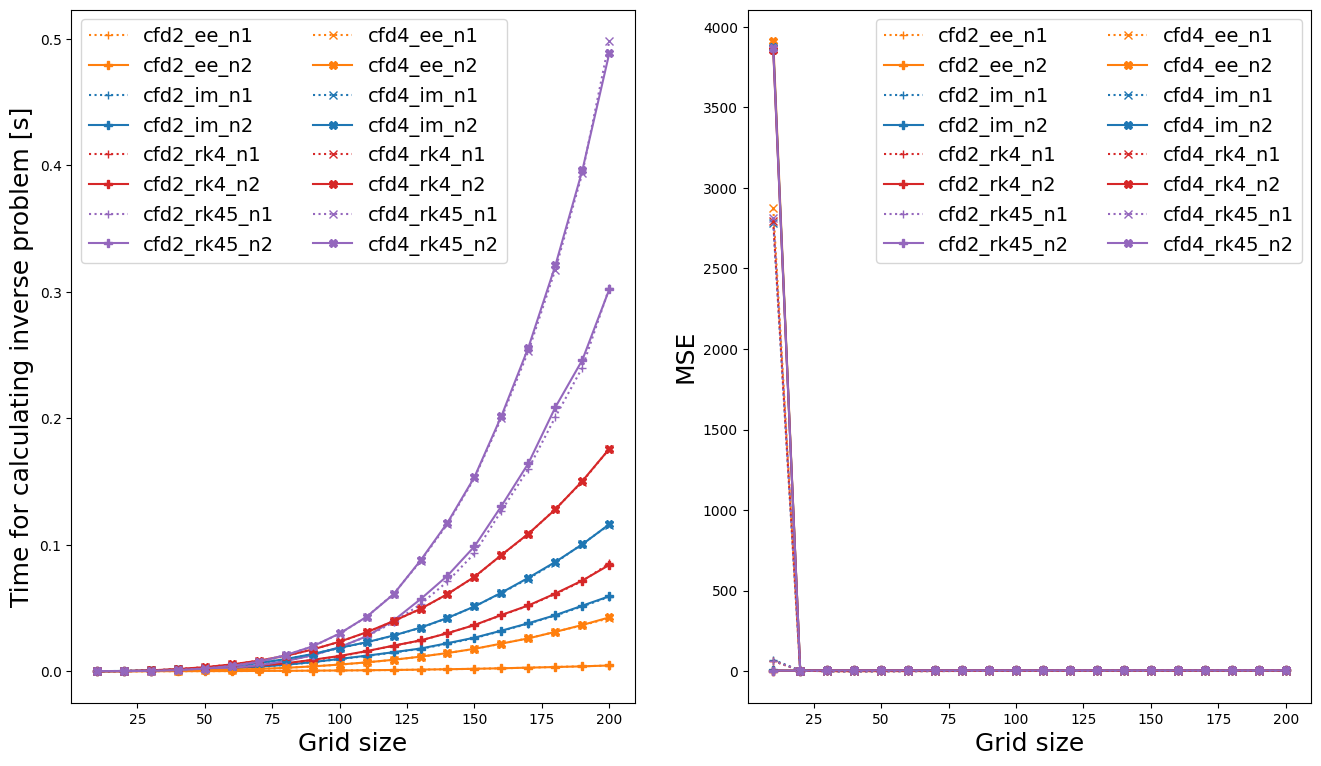

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 9))

for l in laplace_opts:
    for i in integrator_opts:
        for b in boundary_opts:
            df_red = df[(df['laplace'] == l) & (df['integrator'] == i) & (df['boundary'] == b)]

            marker = get_marker(laplace=l, boundary=b)
            color  = get_color(i)
            label  = get_shorthand(laplace=l, integrator=i, boundary=b)
            linestyle = ":" if b == "Neumann (1)" else "-"

            ax[0].plot(df_red['space_grid_size'].to_numpy(),
                       df_red['fwd_time_s'].to_numpy(),
                       label=label, marker=marker, color=color, linestyle=linestyle)
            ax[1].plot(df_red['space_grid_size'].to_numpy(),
                       df_red['fwd_mse'].to_numpy(),
                       label=label, marker=marker, color=color, linestyle=linestyle)

ax[0].set_xlabel("Grid size", fontsize=18)
ax[0].set_ylabel("Time for calculating inverse problem [s]", fontsize=18)
ax[0].legend(ncols=2, fontsize=14)

ax[1].set_xlabel("Grid size", fontsize=18)
ax[1].set_ylabel("MSE", fontsize=18)
ax[1].legend(ncols=2, fontsize=14)

if SAVE_PLOTS:
    plt.savefig("compare_grid_size_fwd.svg")

plt.show()

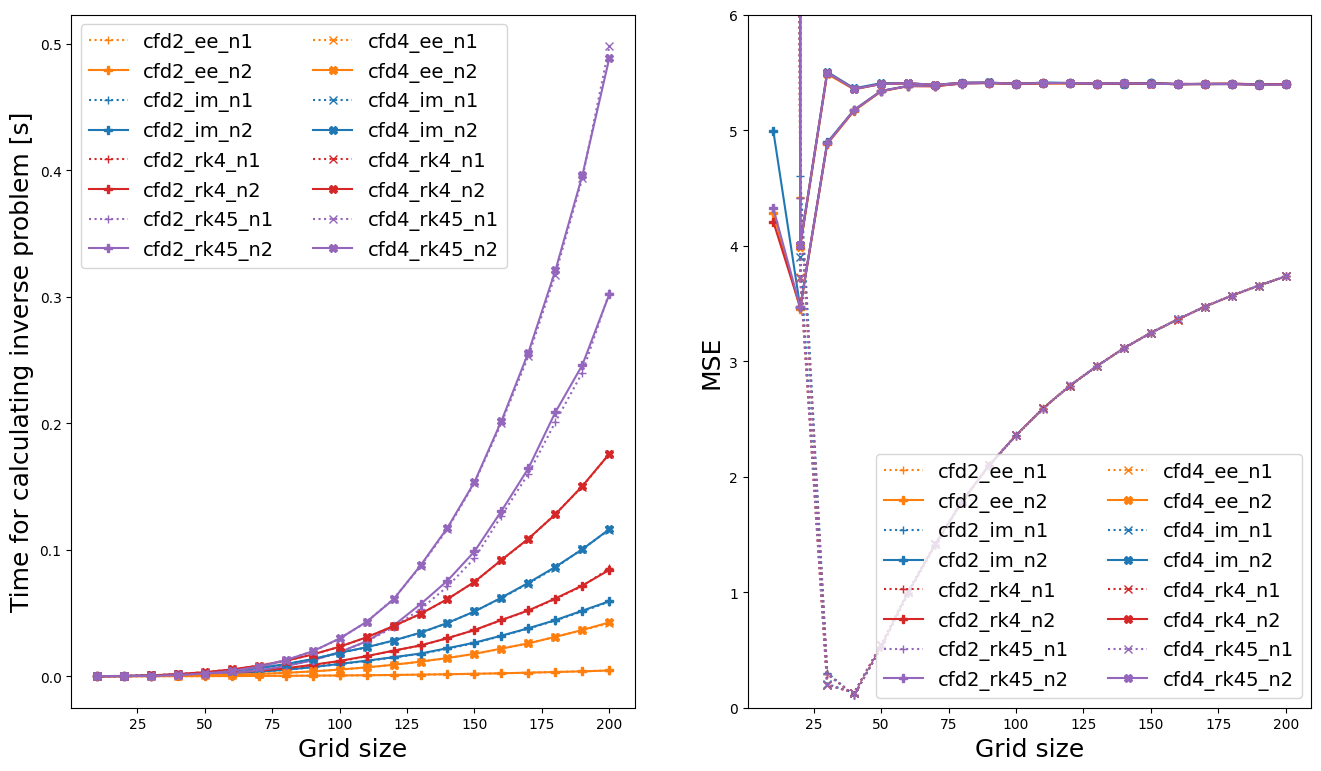

In [14]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 9))

for l in laplace_opts:
    for i in integrator_opts:
        for b in boundary_opts:
            df_red = df[(df['laplace'] == l) & (df['integrator'] == i) & (df['boundary'] == b)]

            marker = get_marker(laplace=l, boundary=b)
            color  = get_color(i)
            label  = get_shorthand(laplace=l, integrator=i, boundary=b)
            linestyle = ":" if b == "Neumann (1)" else "-"

            ax[0].plot(df_red['space_grid_size'].to_numpy(),
                       df_red['fwd_time_s'].to_numpy(),
                       label=label, marker=marker, color=color, linestyle=linestyle)
            ax[1].plot(df_red['space_grid_size'].to_numpy(),
                       df_red['fwd_mse'].to_numpy(),
                       label=label, marker=marker, color=color, linestyle=linestyle)

ax[0].set_xlabel("Grid size", fontsize=18)
ax[0].set_ylabel("Time for calculating inverse problem [s]", fontsize=18)
ax[0].legend(ncols=2, fontsize=14)

ax[1].set_xlabel("Grid size", fontsize=18)
ax[1].set_ylabel("MSE", fontsize=18)
ax[1].legend(ncols=2, fontsize=14)
ax[1].set_ylim((0, 6))

if SAVE_PLOTS:
    plt.savefig("compare_grid_size_fwd_no_outlier.svg")

plt.show()